In [15]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from pathlib import Path



In [2]:
# traffic_crash_url = "https://data.cityofchicago.org/resource/85ca-t3if.json"
# people_url = "https://data.cityofchicago.org/resource/u6pd-qa9d.json"
# vehicles_url= "https://data.cityofchicago.org/resource/68nd-jvt3.json"

# people = requests.get(people_url).json()
#people_df = pd.DataFrame()
# people[0]

In [3]:
# Import csv files 
crashes_file = Path("Resources/Crashes.csv")
people_file = Path("Resources/People.csv")
vehicles_file = Path("Resources/Vehicles.csv")

# Create dataframe
crashes_df = pd.read_csv(crashes_file, encoding="ISO-8859-1")
people_df = pd.read_csv(people_file, encoding="ISO-8859-1")
vehicles_df = pd.read_csv(vehicles_file, encoding="ISO-8859-1")

/var/folders/1b/6b_d286x5_xghzk2zgrg7v600000gn/T/ipykernel_45180/727080347.py:8: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  people_df = pd.read_csv(people_file, encoding="ISO-8859-1")
/var/folders/1b/6b_d286x5_xghzk2zgrg7v600000gn/T/ipykernel_45180/727080347.py:9: DtypeWarning: Columns (21,40,41,42,44,48,49,50,55,58,59,61) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles_df = pd.read_csv(vehicles_file, encoding="ISO-8859-1")


In [4]:
crashes_df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [5]:
crashes_df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,Boundaries - ZIP Codes
0,5e5667bedce936fb6768c48cd1d1d71af618061fe0e476...,JG102768,NaN,12/31/2022 11:45:00 PM,30,UNKNOWN,UNKNOWN,UNKNOWN,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,1.0,0.0,23,7,12,41.744200,-87.566268,POINT (-87.566268248099 41.744200188109),25.0
1,70741202005e9dc65235b75cc964f49922cf0b2739a70e...,JG100137,NaN,12/31/2022 11:45:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,1.0,0.0,23,7,12,41.732755,-87.643378,POINT (-87.643378250291 41.732755134892),59.0
2,4d9e6b59a3bcd01da5b47b3dde57279b65ff6e1c38b876...,JG100010,NaN,12/31/2022 11:41:00 PM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,...,0.0,3.0,0.0,23,7,12,41.893294,-87.620393,POINT (-87.620392894691 41.893293676585),6.0
3,6bba425e1d1475ded168e595931396369489ecb3ddea93...,JG100558,NaN,12/31/2022 11:34:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,"DARKNESS, LIGHTED ROAD",OTHER OBJECT,...,0.0,2.0,0.0,23,7,12,41.891405,-87.639978,POINT (-87.639977804097 41.891404990596),55.0
4,8676096992be377999dbc3683a8f23a4d3e7ccc1d1a805...,JG100023,NaN,12/31/2022 11:33:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,...,0.0,3.0,0.0,23,7,12,41.938635,-87.721709,POINT (-87.72170920519 41.938635325153),39.0


In [6]:
people_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

In [7]:
people_df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O1492690,DRIVER,5e5667bedce936fb6768c48cd1d1d71af618061fe0e476...,JG102768,1418983.0,12/31/2022 11:45:00 PM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O1491553,DRIVER,70741202005e9dc65235b75cc964f49922cf0b2739a70e...,JG100137,1417896.0,12/31/2022 11:45:00 PM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O1491522,DRIVER,4d9e6b59a3bcd01da5b47b3dde57279b65ff6e1c38b876...,JG100010,1417866.0,12/31/2022 11:41:00 PM,NaN,CHICAGO,IL,60628,...,NaN,IMPROPER PASSING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O1491523,DRIVER,4d9e6b59a3bcd01da5b47b3dde57279b65ff6e1c38b876...,JG100010,1417870.0,12/31/2022 11:41:00 PM,NaN,CHICAGO,IL,60626,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,P329915,PASSENGER,4d9e6b59a3bcd01da5b47b3dde57279b65ff6e1c38b876...,JG100010,1417866.0,12/31/2022 11:41:00 PM,3.0,CHICAGO,IL,60643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
vehicles_df.columns


Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       '

In [9]:
vehicles_df.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1492690,5e5667bedce936fb6768c48cd1d1d71af618061fe0e476...,JG102768,12/31/2022 11:45:00 PM,1,DRIVER,NaN,1418983.0,NaN,UNKNOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1492691,5e5667bedce936fb6768c48cd1d1d71af618061fe0e476...,JG102768,12/31/2022 11:45:00 PM,2,PARKED,NaN,1418995.0,NaN,CHEVROLET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1491553,70741202005e9dc65235b75cc964f49922cf0b2739a70e...,JG100137,12/31/2022 11:45:00 PM,1,DRIVER,NaN,1417896.0,NaN,CHEVROLET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1491569,70741202005e9dc65235b75cc964f49922cf0b2739a70e...,JG100137,12/31/2022 11:45:00 PM,2,PARKED,NaN,1417911.0,NaN,CHEVROLET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1491576,70741202005e9dc65235b75cc964f49922cf0b2739a70e...,JG100137,12/31/2022 11:45:00 PM,3,PARKED,NaN,1417914.0,NaN,NISSAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Traffic accidents in City of Chicago – When and where is it safest to travel through Chicago, looking at just serious injuries and fatalities, last 5 years (2018-2022)

In [ ]:
# What are the most fatal intersections in Chicago?


In [ ]:
# When are the most fatal months? (time series analysis) – Jian Liu


In [ ]:
# What are the most common causes? (summary statistics) – Cynthia Saving


In [24]:
# What driver age is most prevalent? (comparison) – Sonia Singh
filtered_age_df = people_df[people_df['PERSON_TYPE'].str.contains('DRIVER', case= False)][['PERSON_TYPE', 'AGE']]
filtered_age_df = filtered_age_df.dropna(subset= ['AGE'])
age_count_df = pd.DataFrame(filtered_age_df['AGE'].value_counts())
age_count_df





,count
AGE,
27.0,3776
29.0,3746
28.0,3703
30.0,3634
31.0,3616
...,...
102.0,3
110.0,1
8.0,1


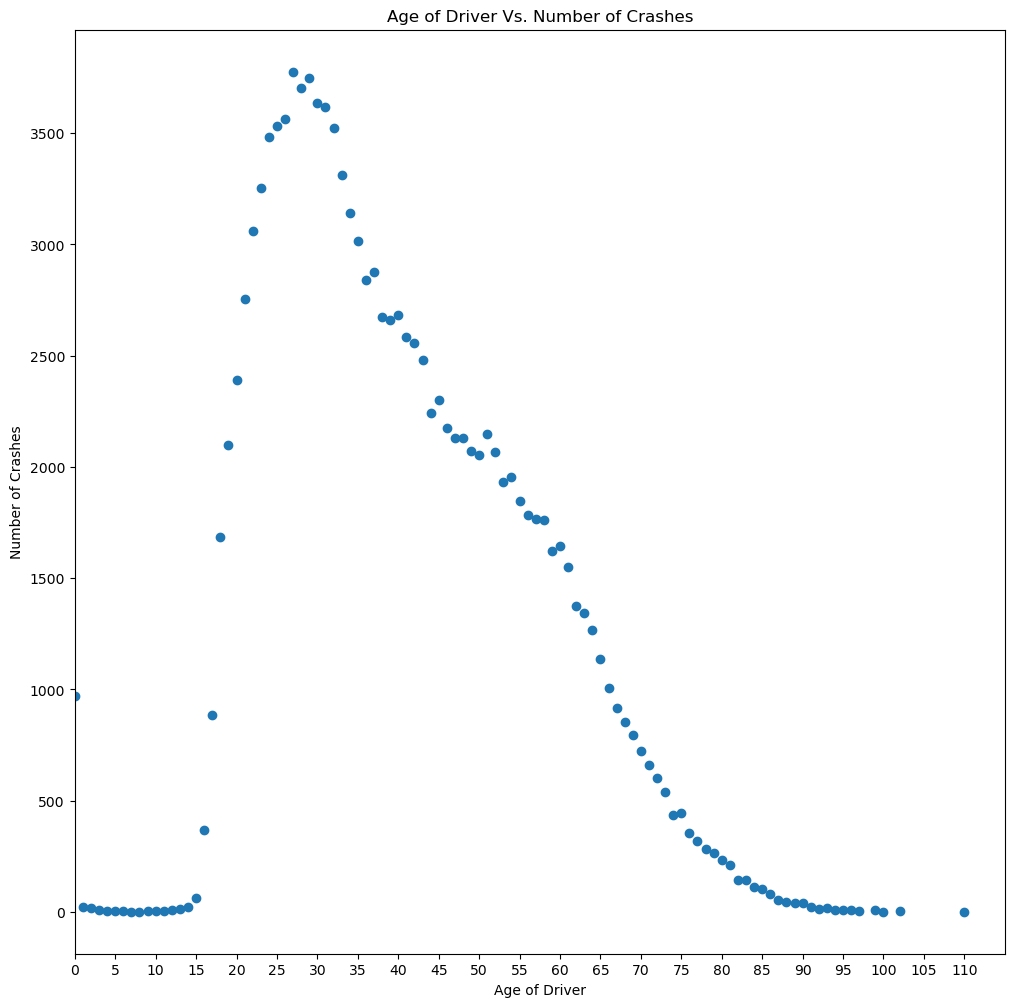

In [42]:
#age comparison visualization - Sonia 
plt.figure(figsize=(12, 12))

plt.scatter(age_count_df.index, age_count_df['count'])
plt.xticks(range(0, 115, 5))
plt.xlim(0, 115)
plt.xlabel('Age of Driver')
plt.ylabel('Number of Crashes')
plt.title('Age of Driver Vs. Number of Crashes')
plt.show()


In [ ]:
# What vehicle age is most common? (correlation) – Tony Quintana


In [12]:
# What vehicle make and/or model is most common? (comparison) – Sean Bell
